# 3D Printing Batch Optimization
## EE 608-WS - Professor Chandramouli
### Tim Demetriades, Nicholas Dodd, Luis Garrido
#### December 10th, 2021

In [1]:
# Import modules
import binpacking    # for greedy best-fit-decreasing offline bin packing algorithm
import pandas as pd  # for holding data
import matplotlib.pyplot as plt    # for plotting results

In [2]:
columns = [' v', 'Area(mm^2)']    # columns wanted from the csv
part_df = pd.read_csv('3D_printer_parts.csv', usecols = columns)    # create dataframe from csv
part_df.head()

,v,Area(mm^2)
0,Hinge_Lower_1,1524.24
1,Hinge_Lower_2,1524.24
2,Hinge_Lower_3,1524.24
3,Hinge_Lower_4,1524.24
4,Hinge_Shoulder_1,1650.00


In [3]:
# Rename columns
part_df.rename(columns = {' v' : 'Part'}, inplace = True)   
part_df.rename(columns = {'Area(mm^2)' : 'Area'}, inplace = True)
part_df.head()

,Part,Area
0,Hinge_Lower_1,1524.24
1,Hinge_Lower_2,1524.24
2,Hinge_Lower_3,1524.24
3,Hinge_Lower_4,1524.24
4,Hinge_Shoulder_1,1650.00


In [4]:
# Create dictionary with parts as keys and areas as values
part_dict = pd.Series(part_df.Area.values,index=part_df.Part).to_dict()

In [5]:
MAX_AREA = 48400    # mm^2

In [6]:
# Apply the algorithm to the data
bins = binpacking.to_constant_volume(part_dict, MAX_AREA)

In [7]:
# Display results
bins

[{'Back_Mount_Plate_1': 37040.28,
  'Lower_Secondary_Brace_1': 7723.1,
  'Shoulder_Back_1': 3034.08,
  'Back_Lock_1': 358.14,
  'Spacer_7': 36.0,
  'Spacer_8': 36.0},
 {'Back_Mount_Plate_2': 37040.28,
  'Lower_Secondary_Brace_2': 7723.1,
  'Shoulder_Back_2': 3034.08,
  'Back_Lock_2': 358.14},
 {'Rotator_PlateC_1': 27294.84,
  'Rotator_Rail_1': 20249.29,
  'Shoulder_Cover_1': 822.96},
 {'Rotator_PlateC_2': 27294.84,
  'Rotator_Rail_2': 20249.29,
  'Shoulder_Cover_2': 822.96},
 {'Rotator_PlateA_1': 24217.0, 'Upper_Brace_1': 17865.0, 'Foot_1': 5322.57},
 {'Rotator_PlateA_2': 24217.0, 'Upper_Brace_2': 17865.0, 'Foot_2': 5322.57},
 {'Rotator_PlateB_1': 24217.0,
  'Cover_1': 13326.11,
  'Lower_Brace_1': 9116.8,
  'Hinge_Shoulder_1': 1650.0,
  'Spacer_3': 36.0,
  'Spacer_4': 36.0},
 {'Rotator_PlateB_2': 24217.0,
  'Cover_2': 13326.11,
  'Lower_Brace_2': 9116.8,
  'Hinge_Shoulder_2': 1650.0,
  'Spacer_5': 36.0,
  'Spacer_6': 36.0},
 {'Chest_Connector_1': 5046.42,
  'Chest_Connector_2': 5046.42

In [8]:
print(f'Number of bins needed: {len(bins)}')

Number of bins needed: 10


In [9]:
# Ideal average desired area 
ideal_value = sum(part_dict.values()) / len(bins)     # total area per bin

# Area of the groups obtained
real_values = [sum(group.values()) for group in bins] # total area per bin

print(f'Ideal area per bin: {ideal_value:.2f}')
print(f'Real areas per bin: {real_values}')

Ideal area per bin: 47538.47
Real areas per bin: [48227.6, 48155.6, 48367.090000000004, 48367.090000000004, 47404.57, 47404.57, 48381.91, 48381.91, 48399.240000000005, 42295.16]


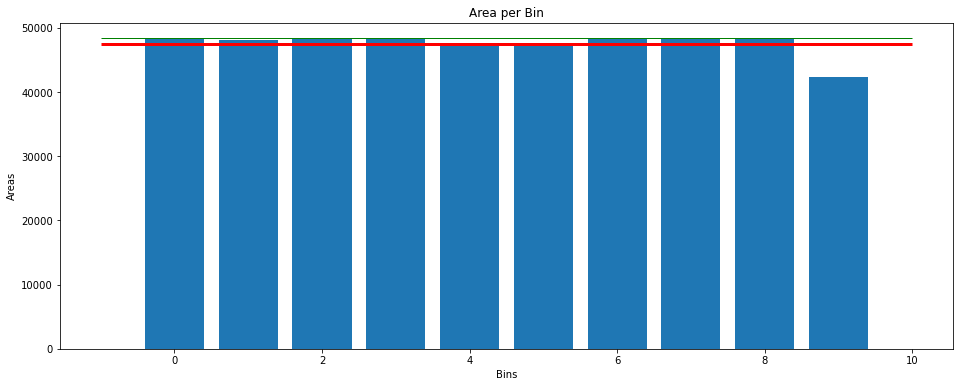

In [10]:
# Plot bar graph showing areas per bin and line showing ideal area per bin
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

ax.bar(x = range(len(bins)), height = real_values)
ax.hlines(ideal_value, -1, len(bins), linewidths = 3, color = 'red')
ax.hlines(MAX_AREA, -1, len(bins), linewidths = 1, color = 'green')

plt.title('Area per Bin')
plt.xlabel('Bins')
plt.ylabel('Areas')

plt.show()

As can be seen in the graph above, the algorithm was able to find a minumum of **10 bins** needed to sort the given parts. We can see that the algorithm was able to do a pretty good job of distributing the parts, with each bin (except the last) having approximately equal areas (fullness). The red line above is the ideal average desired area per each bin and the green line is the maximum area each bin can hold. We can see that the algorithm was able to create bins whose areas were very close to the ideal average desired area.